In [47]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load the relevant files / data

In [2]:
from astropy.io import fits

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
CSCDATA = fits.open('chandra_filtered_small.fits')[1].data

In [4]:
CSCDATA.columns

ColDefs(
    name = 'DETECT_ID'; format = '29A'
    name = 'LIKELIHOOD'; format = 'D'
    name = 'THETA'; format = 'D'; unit = 'arcmin'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'EXTSRC_CLASS'; format = '8A'
    name = 'EXT_RDATA'; format = 'J'; unit = 'count'; null = -999
    name = 'EXT_AMPL'; format = 'D'; unit = 'cm-2 ph s-1'
    name = 'EXT_SMAJ'; format = 'D'; unit = 'arcsec'
    name = 'EXT_SMIN'; format = 'D'; unit = 'arcsec'
    name = 'S/B'; format = 'D'
    name = 'M/B'; format = 'D'
    name = 'H/B'; format = 'D'
)

In [26]:
h_ratio = CSCDATA['H/B']
h_ratio[np.isnan(CSCDATA['H/B'])] = 1.e-10
h_ratio[CSCDATA['H/B'] == 0.0] = 1.e-10

In [27]:
s_ratio = CSCDATA['S/B']
s_ratio[np.isnan(CSCDATA['S/B'])] = 1.e-10
s_ratio[CSCDATA['S/B'] == 0.0] = 1.e-10

In [34]:
ii = (np.log10(h_ratio) >= -5) & (np.log10(h_ratio) <= 5) & \
     (np.log10(s_ratio) >= -5) & (np.log10(s_ratio) <= 5)

print(len(ii))

137312


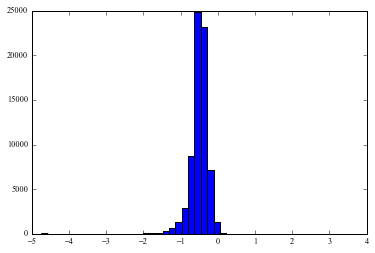

In [35]:
x = plt.hist(np.log10(h_ratio[ii]), 50)

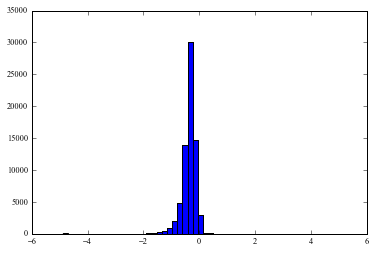

In [36]:
x = plt.hist(np.log10(s_ratio[ii]), 50)

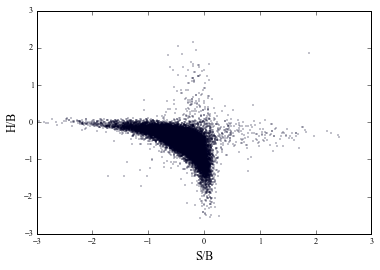

In [53]:
plt.scatter(np.log10(s_ratio[ii]), np.log10(h_ratio[ii]), marker='.', s=3, alpha=0.3)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("S/B")
plt.ylabel("H/B")

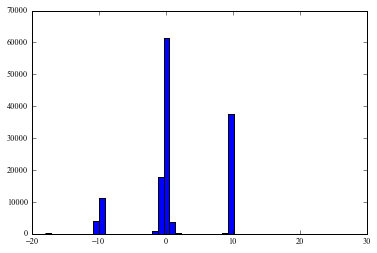

In [55]:
x = plt.hist(np.log10(h_ratio/s_ratio), 50)

### Transform to galactic (l,b) coordinates

In [57]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [70]:
def get_l_b():
    """ Return the Galactic (l,b) coordinates for the table """
    ra_deg  = CSCDATA['RA']
    dec_deg = CSCDATA['DEC']
    c = SkyCoord(ra=ra_deg*u.deg, dec=dec_deg*u.deg, frame='icrs')
    l = c.galactic.l.deg
    b = c.galactic.b.deg
    return (l,b)

In [71]:
(l,b) = get_l_b()

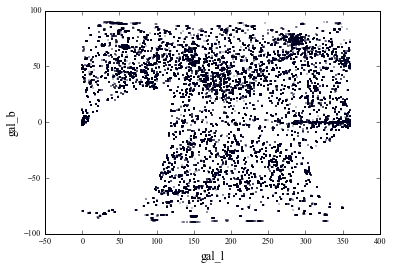

In [77]:
plt.scatter(l, b, marker='.', s=3, alpha=0.3)
plt.xlabel('gal_l')
plt.ylabel('gal_b')

## Create the dataset we want to work with

In [78]:
data = np.vstack([np.log10(h_ratio[ii]/s_ratio[ii]), l[ii], b[ii]])

In [79]:
data.shape

(3, 70925)

Let's sort things into "Galactic" vs "Extragalactic" based on hardness ratio, location, and dust extinction.

I'm just going to guess that things with H/S > 5 are highly obscurred.

Also X-ray objects that are in the Galactic plane and the bulk of the MW are 